## Installations

#Set up

Run 8 cells hidden

## Download packages

- pretrained models
- prefitted scaler/normalizer

VGG16 model:  https://drive.google.com/file/d/1J9m90wBHW8or81-D7qV8EF54g5fzOEGv/view?usp=drive_link

In [2]:
!gdown 1J9m90wBHW8or81-D7qV8EF54g5fzOEGv

Downloading...
From: https://drive.google.com/uc?id=1J9m90wBHW8or81-D7qV8EF54g5fzOEGv
To: /content/VGG16_transfer.zip
100% 57.2M/57.2M [00:00<00:00, 105MB/s]


In [3]:
!unzip VGG16_transfer.zip

Archive:  VGG16_transfer.zip
   creating: VGG16_transfer/assets/
  inflating: VGG16_transfer/keras_metadata.pb  
  inflating: VGG16_transfer/fingerprint.pb  
  inflating: VGG16_transfer/variables/variables.index  
  inflating: VGG16_transfer/saved_model.pb  
  inflating: VGG16_transfer/variables/variables.data-00000-of-00001  


## Load models

In [4]:
import tensorflow as tf

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('VGG16_transfer')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 14,980,935
Trainable params: 266,247
Non-trainable params: 14,714,688
______________________________________

## Data preparation

In [5]:
from google.colab import files
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [6]:
class_names = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

#Deploying

Click `Run Cell` button, upload image and wait for the result

Saving IMG_20230707_122324.jpg to IMG_20230707_122324.jpg
1/1 [==============================] - 1s 1s/step
This one is: metal


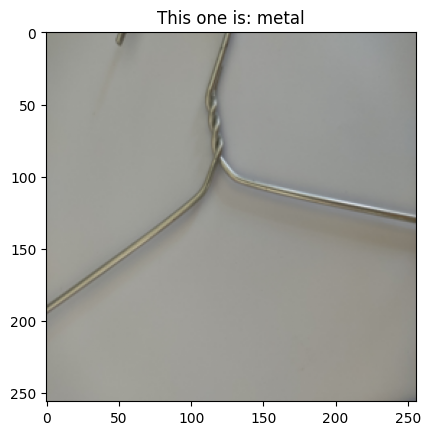

In [7]:
#@title classify trash with a image
uploaded = files.upload()
image_name = uploaded.keys()
for path in image_name:
    image_name = path
    break

img = Image.open(image_name).convert('RGB').resize((256,256), Image.BICUBIC)
img = np.array([np.array(img)]) / 255.
y_pred = np.argmax(new_model.predict(img), axis=1)[0]

plt.imshow(img[0])
plt.title(f"This one is: {class_names[y_pred]}")

print(f"This one is: {class_names[y_pred]}")